# Business Understanding

The dataset for Seattle AirBnB comprises information regarding AirBnB accommodations in Seattle, along with their availability in the calendar and the feedback shared by users who have stayed there. With this dataset, my aim is to address the subsequent business inquiries.

### Understandings of Price Seasonal and Usage trend:

1. Indicating the seasonal pattern of Price and Accommodation Usage trend?
2. Which neighborhoods the price reach the highest and lowest in a year?
3. How does property types within neighborhoods impact price for the most expensive neighborhoods and most common property types?

### Price Prediction
4. Can we predict price for a given listing? What factors of the listing correlate best for predicting price?


# Data Understanding

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from collections import Counter
%matplotlib inline

In [168]:
df_listing = pd.read_csv('./listings.csv')
df_calendar = pd.read_csv('./calendar.csv')
df_reviews = pd.read_csv('./reviews.csv')

In [169]:
df_listing.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [170]:
df_listing.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [171]:
df_calendar.head(5)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [172]:
df_calendar.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [173]:
df_reviews.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [174]:
df_reviews.describe()

,listing_id,id,reviewer_id
count,8.484900e+04,8.484900e+04,8.484900e+04
mean,3.005067e+06,3.058765e+07,1.701301e+07
std,2.472877e+06,1.636613e+07,1.353704e+07
min,4.291000e+03,3.721000e+03,1.500000e+01
25%,7.946330e+05,1.725127e+07,5.053141e+06
50%,2.488228e+06,3.228809e+07,1.413476e+07
75%,4.694479e+06,4.457648e+07,2.762402e+07
max,1.024814e+07,5.873651e+07,5.281274e+07


### Exploring datasets detail:

#### Calendar Dataset:
1. Number of col, row of the dataset
2. Identify which columns have missing data

In [177]:
print(df_calendar.shape)
print(df_calendar.isnull().sum())
print(df_calendar.describe())

(1393570, 4)
listing_id         0
date               0
available          0
price         459028
dtype: int64
         listing_id
count  1.393570e+06
mean   5.550111e+06
std    2.962274e+06
min    3.335000e+03
25%    3.258213e+06
50%    6.118244e+06
75%    8.035212e+06
max    1.034016e+07


Conclusion: The only column has missing value is price, due to the fact that the price is missing only when the listing is not available.

#### Listings Dataset

1. Number of col, row of the dataset
2. Identify which columns have missing data
3. Other detail of categorical variable

In [178]:
print(df_listing.shape)

(3818, 92)


In [179]:
print(df_listing.isnull().sum())

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64


In [180]:
df_listing.columns[df_listing.isnull().any()]

Index(['summary', 'space', 'neighborhood_overview', 'notes', 'transit',
       'thumbnail_url', 'medium_url', 'xl_picture_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'zipcode', 'property_type', 'bathrooms', 'bedrooms', 'beds',
       'square_feet', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'reviews_per_month'],
      dtype='object')

In [181]:
# Describe
print(df_listing.describe(include='all'))

                  id                          listing_url     scrape_id  \
count   3.818000e+03                                 3818  3.818000e+03   
unique           NaN                                 3818           NaN   
top              NaN  https://www.airbnb.com/rooms/117862           NaN   
freq             NaN                                    1           NaN   
mean    5.550111e+06                                  NaN  2.016010e+13   
std     2.962660e+06                                  NaN  0.000000e+00   
min     3.335000e+03                                  NaN  2.016010e+13   
25%     3.258256e+06                                  NaN  2.016010e+13   
50%     6.118244e+06                                  NaN  2.016010e+13   
75%     8.035127e+06                                  NaN  2.016010e+13   
max     1.034016e+07                                  NaN  2.016010e+13   

       last_scraped                    name  \
count          3818                    3818   
uniqu

Conclusion: The experiences offered are None for all rows.

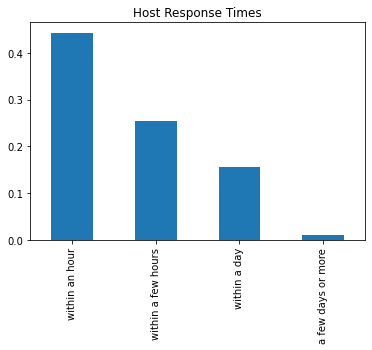

In [134]:
# Explore host_response_time
host_response_vals = df_listing['host_response_time'].value_counts()
(host_response_vals/df_listing.shape[0]).plot(kind="bar");
plt.title("Host Response Times");

Conclusion: Most of hosts replies to their users within an hours and very few of hosts response after few days or more

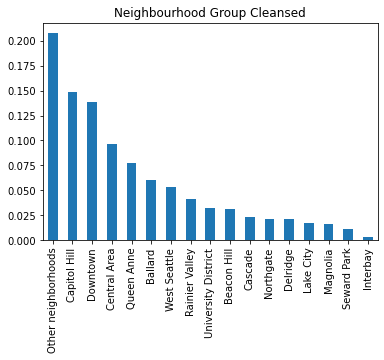

In [135]:
# Explore neighborhood_group_cleansed
neigh_vals = df_listing['neighbourhood_group_cleansed'].value_counts()
(neigh_vals/df_listing.shape[0]).plot(kind="bar");
plt.title("Neighbourhood Group Cleansed");

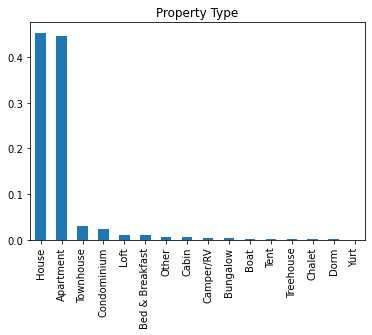

In [136]:
# Explore Categorical Feature - property_type
prop_vals = df_listing['property_type'].value_counts()
(prop_vals/df_listing.shape[0]).plot(kind="bar");
plt.title("Property Type");

#### Review Dataset

1. Number of col, row of the dataset
2. Identify which columns have missing data
3. Other detail of categorical variable

In [137]:
print("Number of rows and columns: ", df_reviews.shape)

Number of rows and columns:  (84849, 6)


In [138]:
print(df_reviews.isnull().sum())

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64


In [139]:
print(df_reviews.describe(include='all'))

          listing_id            id        date   reviewer_id reviewer_name  \
count   8.484900e+04  8.484900e+04       84849  8.484900e+04         84849   
unique           NaN           NaN        1930           NaN         14380   
top              NaN           NaN  2015-09-21           NaN         David   
freq             NaN           NaN         580           NaN           870   
mean    3.005067e+06  3.058765e+07         NaN  1.701301e+07           NaN   
std     2.472877e+06  1.636613e+07         NaN  1.353704e+07           NaN   
min     4.291000e+03  3.721000e+03         NaN  1.500000e+01           NaN   
25%     7.946330e+05  1.725127e+07         NaN  5.053141e+06           NaN   
50%     2.488228e+06  3.228809e+07         NaN  1.413476e+07           NaN   
75%     4.694479e+06  4.457648e+07         NaN  2.762402e+07           NaN   
max     1.024814e+07  5.873651e+07         NaN  5.281274e+07           NaN   

                                                 comments  
cou

# Data Preparation

### Understandings of Price Seasonal and Usage trend:

1. Indicating the seasonal pattern of Price and Accommodation Usage trend?
2. Which neighborhoods the price reach the highest and lowest in a year?
3. How does property types within neighborhoods impact price for the most expensive neighborhoods and most common property types?

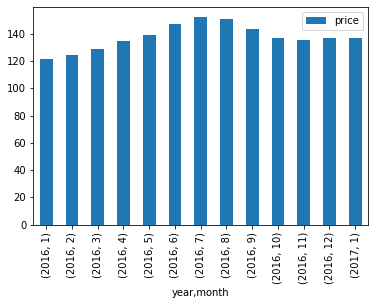

In [140]:
# Plot the average price by month 
df_calendar['year'] = pd.DatetimeIndex(df_calendar['date']).year
df_calendar['month'] = pd.DatetimeIndex(df_calendar['date']).month

# In order to average price, we will be converting it to float and removing the $ sign
df_calendar['price'] = df_calendar['price'].replace('[\$,]', '', regex=True).astype(float)

df_calendar.groupby(['year','month'])[['price']].mean().plot(kind="bar");

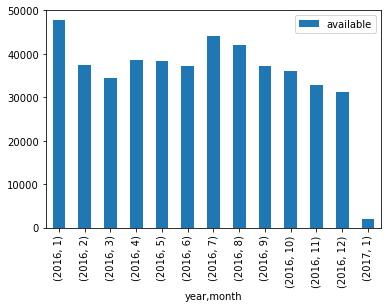

In [141]:
df_calendarusage = df_calendar.loc[df_calendar['available'] == "f"]
df_calendarusage.groupby(['year','month'])[['available']].count().plot(kind="bar");

##### Conlusion: 
- The price had an unward trend during this year in general. Specifically, the peak months of the price were june, july and august. The price reached the highest in August.
- Meanwhile, the demand of booking accommodation fluctuated during the year. The highest number of bookings was in January, following by July and August.


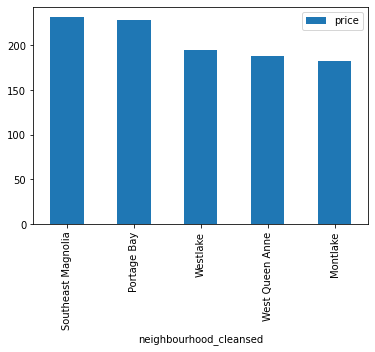

In [142]:
# In order to average price, we will be converting it to float and removing the $ sign
df_listing['price'] = df_listing['price'].replace('[\$,]', '', regex=True).astype(float)

# Plot top 10 neighborhoods
top10_neigh = df_listing.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False).head()
top10_neigh.plot(kind='bar');

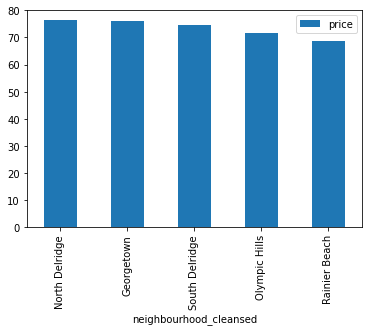

In [143]:
# Plot bottom 10 neighborhoods
bottom10_neigh = df_listing.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False).tail()
bottom10_neigh.plot(kind='bar');

##### Conlusion: 
- Neighborhood had the highest price was Southest Mangolia, followed by Portage Bay, Westlake, West Queen Anne, Montlake
- Neighborhoods had the lowest price was Rainer Beach, followed by North and South Delridge, GeorgeTown, Olympic Hills.

In [144]:
values_keep_neigh = ('Southeast Magnolia','Portage Bay','Westlake','West Queen Anne','Montlake')
values_keep_prop = ('Apartment','House')
df_listings_pruned1 = df_listing.loc[df_listing['neighbourhood_cleansed'].isin(values_keep_neigh)]
df_listings_pruned2 = df_listings_pruned1.loc[df_listing['property_type'].isin(values_keep_prop)]

df_neigh_prop = df_listings_pruned2.groupby(['neighbourhood_cleansed','property_type'])[['price']].mean().reset_index()
df_neigh_prop

,neighbourhood_cleansed,property_type,price
0,Montlake,Apartment,133.333333
1,Montlake,House,191.533333
2,Portage Bay,Apartment,113.833333
3,Portage Bay,House,340.285714
4,Southeast Magnolia,Apartment,219.600000
5,Southeast Magnolia,House,234.100000
6,West Queen Anne,Apartment,128.208333
7,West Queen Anne,House,247.393939
8,Westlake,Apartment,142.400000
9,Westlake,House,168.000000


In [145]:
price_arr = df_neigh_prop['price'].values
price_arr = np.reshape(price_arr, (5,2))
price_arr.shape

(5, 2)

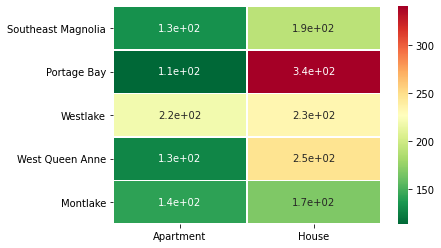

In [146]:
# Heatmap reference: https://stackoverflow.com/questions/12286607/making-heatmap-from-pandas-dataframe
idx = ['Southeast Magnolia','Portage Bay','Westlake','West Queen Anne','Montlake']
cols = ['Apartment', 'House']
df = pd.DataFrame(price_arr, index=idx, columns=cols)

# _r reverses the normal order of the color map 'RdYlGn'
sns.heatmap(df, cmap='RdYlGn_r', linewidths=0.5, annot=True);

##### Conlusion: 
- Mainly focus the highest-priced neighborhoods listed in the previous analysis and primarily focusing on houses and apartments as they constitute a significant proportion of the property types.

- From the analysis, it indcates that Portage Bay has the most expensive houses, followed by West Queen Anne and Westlake. Besides, in Westlake, both houses and apartments are priced similarly.

###  Price Prediction:
Can we predict price for a given listing? What factors of the listing correlate best for predicting price?

In [147]:
df_listing['price'].isnull().sum()

0

-> No rows would be eliminated from the dataset

In [148]:
df_list = df_listing.copy()
cols_less_impact = ['id','listing_url','scrape_id','last_scraped','thumbnail_url','medium_url','license','xl_picture_url','host_id','host_url','host_thumbnail_url','host_verifications','street','neighbourhood','neighbourhood_group_cleansed','zipcode','smart_location','country','latitude','longitude','weekly_price','monthly_price','calendar_updated','calendar_last_scraped','first_review','last_review','calculated_host_listings_count','reviews_per_month']
df_list = df_list.drop(cols_less_impact, axis=1)
df_list.shape

(3818, 64)

In [149]:
num_cols = df_list.select_dtypes(include=['float', 'int']).columns
for col in num_cols:
    print(col,df_list[col].isnull().sum())

host_listings_count 2
host_total_listings_count 2
accommodates 0
bathrooms 16
bedrooms 6
beds 1
square_feet 3721
price 0
guests_included 0
minimum_nights 0
maximum_nights 0
availability_30 0
availability_60 0
availability_90 0
availability_365 0
number_of_reviews 0
review_scores_rating 647
review_scores_accuracy 658
review_scores_cleanliness 653
review_scores_checkin 658
review_scores_communication 651
review_scores_location 655
review_scores_value 656


#### Conclusion:

bathrooms - 16 records with NaN for bathrooms. Since it's a small percentage -> set bathrooms to 0 for Nan values

bedrooms - Since all the rows with blank bedroom field have beds value of at least 1, fill in 1 for "bedrooms" where value is Nan

beds - For the 1 record that have beds as Nan, bed_type is specified as Real Bed, filling "beds" to 1

square_feet - Most of this field is Nan -> drop this column

review_scores columns - Since these are review related scores -> setting all Nan values to 0 assuming no review scores for these listings.

host_listings_count and host_total_listings_count - There are only 2 rows with no values. it was determined that these host IDs only have 1 record associated with them each, so populat with 1.

In [150]:

df_list['bathrooms'] = df_list['bathrooms'].fillna(0)


df_list['bedrooms'] = df_list['bedrooms'].fillna(1)


df_list['beds'] = df_list['beds'].fillna(1)


df_list = df_list.drop('square_feet',axis=1)


cols_fillna_0 = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']
for col in cols_fillna_0:
    df_list[col] = df_list[col].fillna(0)


df_list['host_listings_count'] = df_list['host_listings_count'].fillna(1)
df_list['host_total_listings_count'] = df_list['host_total_listings_count'].fillna(1)

In [151]:
cat_cols = df_list.select_dtypes(include=['object']).columns
for col in cat_cols:
        print(col,df_list[col].isnull().sum())

name 0
summary 177
space 569
description 0
experiences_offered 0
neighborhood_overview 1032
notes 1606
transit 934
picture_url 0
host_name 2
host_since 2
host_location 8
host_about 859
host_response_time 523
host_response_rate 523
host_acceptance_rate 773
host_is_superhost 2
host_picture_url 2
host_neighbourhood 300
host_has_profile_pic 2
host_identity_verified 2
neighbourhood_cleansed 0
city 0
state 0
market 0
country_code 0
is_location_exact 0
property_type 1
room_type 0
bed_type 0
amenities 0
security_deposit 1952
cleaning_fee 1030
extra_people 0
has_availability 0
requires_license 0
jurisdiction_names 0
instant_bookable 0
cancellation_policy 0
require_guest_profile_picture 0
require_guest_phone_verification 0


#### Conclusion:

summary, space, neighborhood_overview, notes, transit - These are all categorical fields describing the property -> convert into boolean fields to indicate if a value exists. Considering listings that have descriptive information available like summary and transit towards price prediction.

host_name, host_since, host_location, host_about, host_picture_url, host_neighbourhood - These are all categorical fields describing the host -> convert into boolean fields to indicate if a value exists.

host_response_time, host_acceptance_rate - Assign N/A where value is Nan

host_response_rate -  Should be numerical field -> convert this to float and setting N/A and blanks to 0.

host_is_superhost, host_has_profile_pic, host_identity_verified - Assign 1 for t, 0 for f and assign Nans with 0

property_type -  drop record with value equal 0

security_deposit - remove $ signs and convert to float

cleaning_fee - remove $ signs and convert to float. Assume 0 where not specific

The following fields do not have missing values, but it is important to cleanse these as well.

name, description, picture_url - convert these fields into boolean fields to indicate if a value exists. consider listings that have descriptive information available like description and picture_url towards price prediction.

experiences_offered - Dropping this column

market - Dropping this column

is_location_exact, has_availability, requires_license, instant_bookable, require_guest_profile_picture, require_guest_phone_verification - these fields have t/f values, will convert to 1/0.

extra_people - Need to remove $ sign and convert to float

jurisdiction_names - Dropping this column

city - There are some inconsistencies in this field where we have several values for Seattle, for example: "Seattle", "Seattle " (with a space at the end) and "seattle". We will convert all city names to lower case and trim spaces in order to standardize.

state - There are both "WA" and "wa" values for state. We will be converting all state names to lowercase in order to standardize.

amenities - this field contains a list of values in each row, we will need to figure out how to handle this column



In [152]:
def set_bool_text(textdata):
    '''
    Function to set all text fields to boolean
    INPUT:
    textdata - the textdata that needs to be converted into a bool value 
    OUTPUT:
    Boolean 0 or 1 - Returns 0 if no text passed, 1 otherwise to indicate presence of the text field
    
    Converts the text columns into a boolean field representing the presence or absence of the text field
    '''
    if not textdata:
        return 0
    else:
        return 1


text_host_fields = ['summary','space','neighborhood_overview','notes','transit','name','description','picture_url','host_name','host_since','host_location','host_about','host_picture_url','host_neighbourhood']
for t in text_host_fields:
    df_list[t] = df_list[t].apply(set_bool_text)

In [153]:
def set_bool_tf(tfdata):
    '''
    Function to set all true/false fields to 1 or 0
    INPUT:
    tfdata - the true or false fields that have 't' and 'f' values that we would like to convert to boolean
    OUTPUT:
    Boolean 0 or 1 - Returns 0 if false, 1 for true
    
    Converts a true or false type field into a boolean with 1 and 0s
    '''
    if tfdata == 't':
        return 1
    else: 
        return 0

tf_fields = ['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact','has_availability','requires_license','instant_bookable','require_guest_profile_picture','require_guest_phone_verification']
for t in tf_fields:
    df_list[t] = df_list[t].apply(set_bool_tf)

In [154]:
# Assign N/A to applicable host fields
df_list['host_response_time'] = df_list['host_response_time'].fillna('N/A')
df_list['host_acceptance_rate'] = df_list['host_acceptance_rate'].fillna('N/A')

df_list['host_response_rate'] = df_list['host_response_rate'].apply(lambda x: 0 if x == 'N/A' else x)
df_list['host_response_rate'] = df_list['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)
df_list['host_response_rate'] = df_list['host_response_rate'].fillna(0)

# Drop record with empty value for property_type
df_list = df_list.dropna(subset=['property_type'], axis=0)

# Clean security_deposit, cleaning_fee and extra people
df_list['security_deposit'] = df_list['security_deposit'].replace('[\$,]', '', regex=True).astype(float)
df_list['cleaning_fee'] = df_list['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)
df_list['extra_people'] = df_list['extra_people'].replace('[\$,]', '', regex=True).astype(float)
df_list['security_deposit'] = df_list['security_deposit'].fillna(0)
df_list['cleaning_fee'] = df_list['cleaning_fee'].fillna(0)

# Drop columns experiences_offered, market and jurisdiction_name
df_list = df_list.drop(['experiences_offered','market','jurisdiction_names',], axis = 1)

# Clean up city names
df_list['city'] = df_list['city'].str.lower()
df_list['city'] = df_list['city'].str.strip()
df_list['state'] = df_list['state'].str.lower()

In [159]:
amenities = []
mylist = []
for index, row in df_list.iterrows():
    row['amenities'] = row['amenities'].replace('{','')
    row['amenities'] = row['amenities'].replace('}','')
    row['amenities'] = row['amenities'].replace('"','')
    mylist = row['amenities'].split(',')
    for l in mylist:
        amenities.append(l)
    
amenities_count = Counter(amenities)
amenities_count.most_common()

[('Wireless Internet', 3666),
 ('Heating', 3626),
 ('Kitchen', 3422),
 ('Smoke Detector', 3280),
 ('Essentials', 3237),
 ('Dryer', 2996),
 ('Washer', 2991),
 ('Internet', 2811),
 ('Shampoo', 2670),
 ('TV', 2574),
 ('Carbon Monoxide Detector', 2485),
 ('Fire Extinguisher', 2196),
 ('Free Parking on Premises', 2166),
 ('Family/Kid Friendly', 1962),
 ('First Aid Kit', 1679),
 ('Cable TV', 1446),
 ('Indoor Fireplace', 885),
 ('Pets live on this property', 882),
 ('Hangers', 846),
 ('Elevator in Building', 785),
 ('Hair Dryer', 774),
 ('Laptop Friendly Workspace', 745),
 ('Iron', 742),
 ('Safety Card', 727),
 ('Air Conditioning', 677),
 ('24-Hour Check-in', 616),
 ('Buzzer/Wireless Intercom', 538),
 ('Dog(s)', 508),
 ('Pets Allowed', 472),
 ('Gym', 442),
 ('Cat(s)', 382),
 ('Hot Tub', 303),
 ('Wheelchair Accessible', 300),
 ('Breakfast', 291),
 ('Suitable for Events', 209),
 ('Pool', 159),
 ('Lock on Bedroom Door', 100),
 ('Doorman', 85),
 ('Smoking Allowed', 82),
 ('Other pet(s)', 50),
 ('

In [160]:
amenities_new_cols =['amenities_wireless_internet|Wireless Internet','amenities_heating|Heating','amenities_kitchen|Kitchen','amenities_smoke_detector|Smoke Detector','amenities_essentials|Essentials','amenities_dryer|Dryer','amenities_washer|Washer','amenities_internet|Internet','amenities_shampoo|Shampoo','amenities_tv|TV','amenities_carbon_monoxide_detector|Carbon Monoxide Detector','amenities_fire_extinguisher|Fire Extinguisher','amenities_free_parking|Free Parking on Premises']
for c in amenities_new_cols:
    c_colname,c_desc = c.split('|')
    df_list[c_colname] = df_list['amenities'].apply(lambda x: 1 if c_desc in x else 0)

In [161]:
# Drop the original amenities field
df_list = df_list.drop('amenities', axis = 1)

In [162]:

# Get Dummies for categorical fields
cat_fields = df_list.select_dtypes(include=['object']).columns

df_list = pd.get_dummies(df_list, columns=cat_fields)
df_list.head()

,name,summary,space,description,neighborhood_overview,notes,transit,picture_url,host_name,host_since,...,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,1,0
1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,1
2,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,1
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,1,0,0
4,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,1


#### Modeling:

In [163]:
y = df_list['price']
X = df_list.drop(['price'], axis=1)

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2671, 190) (2671,)
(1146, 190) (1146,)


In [165]:
# Instantiate linear regression model and fit it to training data set
lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train) 
        
# Predict and score the model
y_train_preds = lm_model.predict(X_train)
y_test_preds = lm_model.predict(X_test) 
train_score = r2_score(y_train, y_train_preds)
test_score = r2_score(y_test,y_test_preds)
print("The rsquared score on the training data was {}.  The rsquared score on the test data was {}.".format(train_score, test_score))

The rsquared score on the training data was 0.6264098435681662.  The rsquared score on the test data was 0.6241762341332338.


In [166]:
def coef_weights(coefficients, X_train):
    '''
    Function to get coefficients back for each of the features
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(10)

,est_int,coefs,abs_coefs
8,host_name,8.132960e+15,8.132960e+15
31,has_availability,7.023049e+15,7.023049e+15
6,transit,-6.931035e+15,6.931035e+15
2,space,-5.359101e+15,5.359101e+15
44,requires_license,4.768541e+15,4.768541e+15
11,host_about,-4.665842e+15,4.665842e+15
5,notes,4.248163e+15,4.248163e+15
14,host_picture_url,-3.573907e+15,3.573907e+15
4,neighborhood_overview,3.127366e+15,3.127366e+15
9,host_since,2.296115e+15,2.296115e+15


#### Conlusion:

After modeling the data, 0.62 on both training and test data sets. The coefficient analysis showed that the combination of host details and descriptive information about the listing such as host_name, has_availability, transit, space, host_about, notes, neighborhood_overview etc has the most impact on the price.